In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
def create_df(directory):    
    "function to create a dataframe with the results with directory containing npz files for all test individuals as input"
    total_rows=[]
    for filename in os.listdir(directory):
        data = np.load(directory+"/"+filename, allow_pickle=True)
        try:
            model_ll = data ['loglls']
            scale_marginal = data['scale']
            se_scale_marginal = data['se_scale_finite_diff']
            scale_joint = data['params'][0]
            eps_joint = data['params'][1]
            se_scale_joint = data['se_params'][0]
            se_eps_joint = data['se_params'][1]
            time = data['time']
            n_snps = data['n_asc_snps']
            avg_dist = data['avg_gen_dist']
            edit_dist = data['edit_dist']
            n_cp_states = data['n_copied_states']
            avg_edit_dist = data['avg_edit_dist']
            mle = data['mle_params']
            path_post = data['path_post']
            path_bl = data['path_bl']
            post_bl = data['post_bl']
            avg_edit_bl = data['avg_edit_bl']
            cp_states_bl = data['cp_states_bl']
            jumps = data['jumps']
            jumps_bl = data['jumps_bl']
        except KeyError:
            print (filename)
        

        cur_row = [model_ll, scale_marginal, se_scale_marginal, scale_joint, se_scale_joint, eps_joint, se_eps_joint, 
                  time, n_snps, avg_dist, edit_dist, n_cp_states, avg_edit_dist, mle, path_post, path_bl, post_bl, avg_edit_bl,
                  cp_states_bl, jumps, jumps_bl]
        total_rows.append(cur_row)

    df = pd.DataFrame(total_rows, columns=["model_ll", "scale_marginal", "se_scale_marginal", "scale_joint",
                                               "se_scale_joint", "eps_joint", "se_eps_joint", "time", "n_snps", "avg_dist", "edit_dist",
                                          "n_states", "avg_edit_dist", "mle", "path_post", "path_bl", "post_bl",
                                          "avg_edit_bl", "cp_states_bl", "jumps", "jumps_bl"])
    return df

In [3]:
directory = "C:/Users/Isabel/Documents/thesis/1MB_100panel_epse-2"
df_100 = create_df(directory)
df_100.sort_values(by='time', inplace=True)

df_100.reset_index(drop=True, inplace=True)
df_100

,model_ll,scale_marginal,se_scale_marginal,scale_joint,se_scale_joint,eps_joint,se_eps_joint,time,n_snps,avg_dist,...,n_states,avg_edit_dist,mle,path_post,path_bl,post_bl,avg_edit_bl,cp_states_bl,jumps,jumps_bl
0,"[-7445.164667865493, -7450.548424009772, -7469...",100.49452102986032,10.100441404398433,100.493442,1.006018,0.000179,0.000018,21.0,5642,0.004929126272147414,...,[22],0.0001772421127259837,fun: 2286.328940886449\n hess_inv: <2x2 ...,-15.237787474164268,"[1, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, ...",-25983.380768790736,0.0,"[0, 1, 10, 12, 13, 14, 16, 17, 18, 19, 2, 21, ...",0,1450
1,"[-34635.126315731846, -34254.353470299924, -33...",1872.4580420281407,47.33069242192147,1872.443777,3.132924,0.005195,0.000119,121.0,5662,0.00492450021009887,...,"[1, 12, 14, 16, 34, 41, 5, 51, 56, 75, 76, 92,...",0.006181561285764747,fun: 31107.825162467983\n hess_inv: <2x2...,-345.0410154061755,"[1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 5, 0, ...",-26209.061293641702,0.0035323207347227126,"[0, 1, 10, 12, 13, 15, 16, 18, 2, 21, 22, 24, ...",13,1542
2,"[-38997.03701773685, -38436.77675294952, -3788...",2165.7899185760166,50.120341485014116,2165.780295,2.477107,0.005754,0.000144,221.0,5664,0.004925897887398517,...,"[0, 10, 13, 15, 19, 27, 32, 42, 47, 5, 51, 68,...",0.005826271186440678,fun: 34425.96864160485\n hess_inv: <2x2 ...,-387.0269775030114,"[1, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 5, 0, 0, ...",-26229.715060782153,0.003884180790960452,"[0, 1, 10, 12, 13, 14, 15, 16, 19, 2, 23, 27, ...",19,1540
3,"[-75580.88031095143, -74504.63061606862, -7341...",5647.999135399791,88.84068217141805,5647.999007,1.002040,0.012008,0.000151,321.0,5691,0.0049186820692078,...,"[0, 1, 10, 14, 27, 28, 3, 32, 36, 38, 4, 5, 51...",0.013530135301353014,fun: 64129.58990226283\n hess_inv: <2x2 ...,-745.3213672299994,"[1, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, ...",-26497.280415121153,0.008961518186610437,"[0, 1, 10, 12, 14, 15, 16, 17, 18, 2, 20, 21, ...",36,1372
4,"[-39989.39298546414, -39415.058437277716, -388...",2426.5128218660966,54.273654793723544,2426.520064,1.894936,0.005500,0.000101,421.0,5666,0.004929491296753705,...,"[1, 10, 14, 16, 17, 21, 25, 28, 29, 30, 32, 37...",0.006000705965407695,fun: 34995.11160266857\n hess_inv: <2x2 ...,-394.59873189099295,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 4, 0, 0, 4, ...",-26248.883698508955,0.004235792446170138,"[0, 1, 10, 12, 13, 14, 15, 16, 17, 18, 19, 2, ...",19,1822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,"[-140600.5785746213, -138814.99196293735, -136...",19119.229911043098,220.048352170247,19119.226459,1.029933,0.024007,0.000223,6221.0,5717,0.004920600605000875,...,"[1, 10, 13, 14, 16, 19, 2, 20, 23, 25, 27, 28,...",0.030435543117019417,fun: 109308.4686900929\n hess_inv: <2x2 ...,-1360.6499764692562,"[1, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 5, 0, 0, ...",-26796.436045756123,0.015567605387440965,"[0, 1, 10, 12, 14, 15, 16, 18, 19, 2, 21, 22, ...",56,1637
63,"[-140800.01156395933, -139102.849237091, -1373...",18842.57256665513,212.7388584023648,18842.570813,1.008570,0.023354,0.000254,6321.0,5727,0.004932428198638506,...,"[0, 1, 10, 12, 15, 16, 18, 19, 23, 27, 29, 3, ...",0.03195390256678889,fun: 108825.34371099969\n hess_inv: <2x2...,-1369.4607324067767,"[1, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, ...",-26830.213767938505,0.01501658809149642,"[0, 1, 10, 12, 13, 14, 15, 16, 17, 18, 19, 2, ...",52,1485
64,"[-141173.60473987364, -139325.1483868386, -137...",20172.630786839934,224.6627647510584,20172.630772,1.000001,0.021805,0.000286,6421.0,5716,0.00493500369884575,...,"[0, 1, 10, 12, 13, 14, 15, 16, 19, 23, 24, 25,...",0.02921623512946116,fun: 107926.067413372\n hess_inv: <2x2 L...,-1376.496255107121,"[1, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, ...",-26734.435892434343,0.013121063680895731,"[0, 1, 10, 12, 13, 14, 15, 16, 17, 18, 19, 2, ...",60,1519
65,"[-154830.7858058529, -152907.0775235152, -1509...",21652.373022980868,242.8925760799751,21652.370553,1.009831,0.0275

In [4]:
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
plt.style.use('ggplot')

Text(0.5, 1.0, 'Jump rate MLE vs Time')

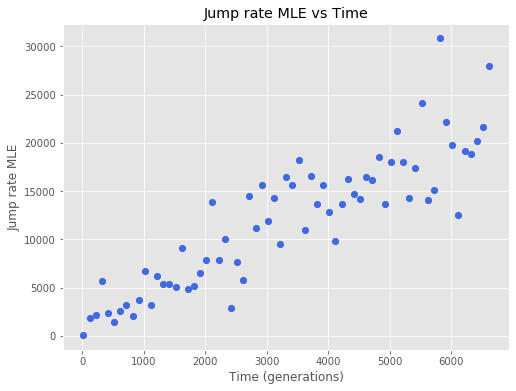

In [5]:
fig, axs = plt.subplots(1, figsize=(8,6))

axs.scatter(df_100.time, df_100.scale_joint, color='royalblue')
axs.errorbar(df_100.time, df_100.scale_joint, yerr=df_100.se_scale_joint, fmt="o", c='royalblue')
axs.set_xlabel('Sample age (generations)') #x label
axs.set_ylabel('Jump rate MLE') #y label
axs.set_title('Jump rate MLE vs Time')

(-0.01, 0.05)

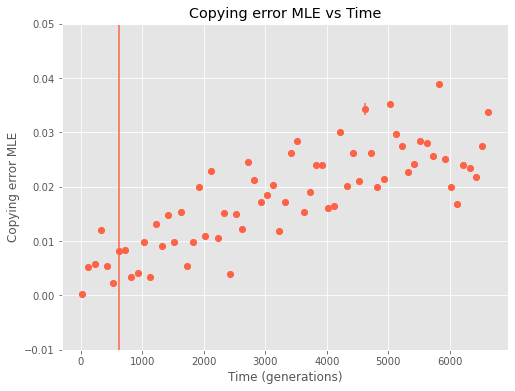

In [8]:
fig, axs = plt.subplots(1, figsize=(8,6))

axs.scatter(df_100.time, df_100.eps_joint, color='tomato')
axs.errorbar(df_100.time, df_100.eps_joint, yerr=df_100.se_eps_joint, fmt="o", c='tomato')
axs.set_xlabel('Time (generations)') #x label
axs.set_ylabel('Copying error MLE') #y label
axs.set_title('Copying error MLE vs Time')
axs.set_ylim(bottom= -0.01, top=0.05)

Text(0.5, 1.0, 'B')

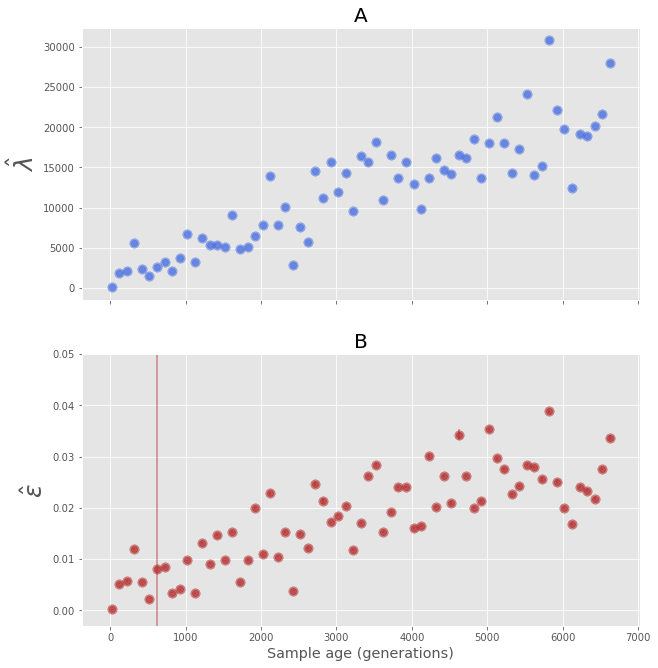

In [7]:
fig, axs = plt.subplots(2, figsize=(10,11), sharex=True)
#fig.suptitle('Maximum Likelihood Estimates vs Time', fontsize='16')

axs[0].scatter(df_100.time, df_100.scale_joint, c='royalblue', alpha=.5, s=90)
axs[0].errorbar(df_100.time, df_100.scale_joint, yerr=df_100.se_scale_joint, fmt="o", c='royalblue', alpha=.5)
#axs[0].set_xlabel('Time (generations)') #x label
axs[0].set_ylabel('$\hat{\lambda}$', fontsize='25') #y label
axs[0].set_title('A',loc='center', fontsize='20')


axs[1].scatter(df_100.time, df_100.eps_joint, c='firebrick', alpha=.5, s=90, marker='o')
axs[1].errorbar(df_100.time, df_100.eps_joint, yerr=df_100.se_eps_joint, fmt="o",  c='firebrick', alpha=.5)
axs[1].set_xlabel('Sample age (generations)', fontsize='x-large') #x label
axs[1].set_ylabel('$\hat{\epsilon}$', fontsize='25') #y label
axs[1].set_ylim(bottom= -0.003, top=0.05)
axs[1].set_title('B',loc='center', fontsize='20')
#axs[1].set_xlim(left=0, right=45000)

Text(0, 0.5, 'Path posterior probability (log)')

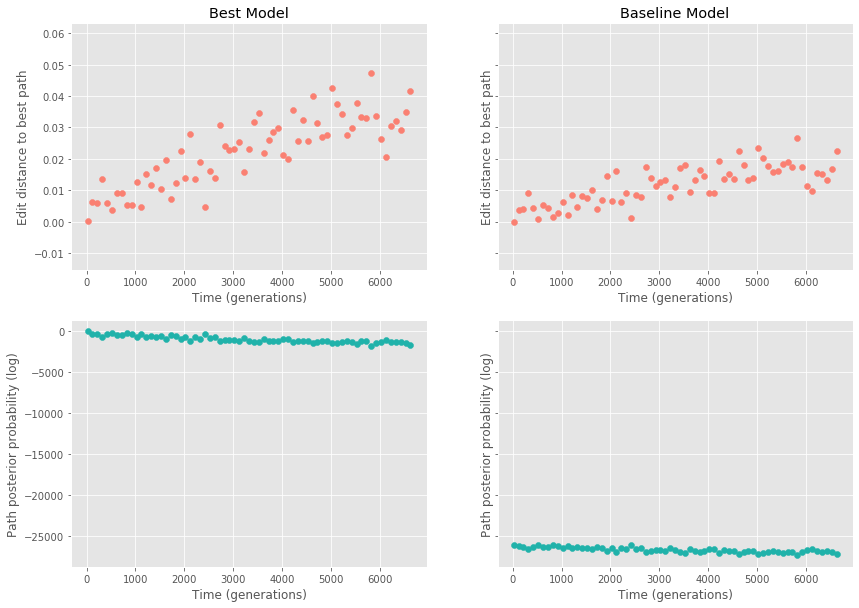

In [6]:
fig, axs = plt.subplots(2,2, figsize=(14,10), sharey='row')

axs[0, 0].scatter(df_100.time, df_100.avg_edit_dist, c='salmon')
axs[0, 0].set_xlabel('Time (generations)') #x label
axs[0, 0].set_ylabel('Edit distance to best path') #y label
axs[0, 0].set_title('Best Model')

axs[0, 1].scatter(df_100.time, df_100.avg_edit_bl, c='salmon')
axs[0, 1].set_xlabel('Time (generations)') #x label
axs[0, 1].set_ylabel('Edit distance to best path') #y label
axs[0, 1].set_title('Baseline Model')

axs[1, 0].scatter(df_100.time, df_100.path_post, c='lightseagreen')
axs[1, 0].set_xlabel('Time (generations)') #x label
axs[1, 0].set_ylabel('Path posterior probability (log)') #y label

axs[1, 1].scatter(df_100.time, df_100.post_bl, c='lightseagreen')
axs[1, 1].set_xlabel('Time (generations)') #x label
axs[1, 1].set_ylabel('Path posterior probability (log)') #y label

Text(0.45, 0.05, 'Sample age (generations)')

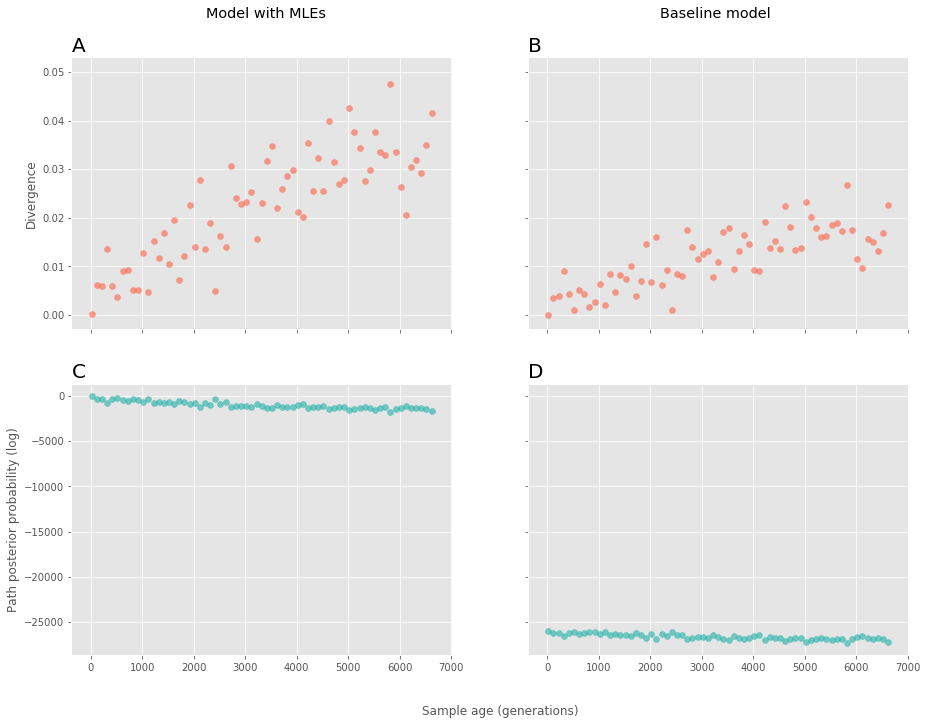

In [9]:
fig, axs = plt.subplots(2,2, figsize=(15,11), sharey='row', sharex=True)
#fig.suptitle('Comparison to a baseline model', fontsize=20)
#fig.text(0.35, 1, 'Comparison to a baseline model', fontsize='xx-large')
fig.text(x=.25 ,y=.93 ,s='Model with MLEs', fontsize='x-large')
fig.text(x=.67 ,y=.93 ,s='Baseline model', fontsize='x-large')

axs[0, 0].scatter(df_100.time, df_100.avg_edit_dist, c='Tomato', alpha=.6)
axs[0, 0].set_ylabel('Divergence') #y label
axs[0, 0].set_title('A', loc='left', fontsize='20')
axs[0,0].set_ylim(top=0.053, bottom=-0.003)

axs[0, 1].scatter(df_100.time, df_100.avg_edit_bl, c='Tomato', alpha=.6)
axs[0, 1].set_title('B', loc='left', fontsize='20')

axs[1, 0].scatter(df_100.time, df_100.path_post, c='lightseagreen', alpha=.6)
#axs[1, 0].set_xlabel('Time (generations)') #x label
axs[1, 0].set_ylabel('Path posterior probability (log)') #y label
axs[1, 0].set_title('C', loc='left', fontsize='20')

axs[1, 1].scatter(df_100.time, df_100.post_bl, c='lightseagreen', alpha=.6)
#axs[1, 1].set_xlabel('Time (generations)') #x label
axs[1, 1].set_title('D', loc='left', fontsize='20')

#fig.suptitle('Comparison to a baseline model', fontsize=16)
#Text(0.5, 0.98, 'Comparison to a baseline model')
fig.text(0.45,0.05,'Sample age (generations)',fontsize='large', c='#565656')

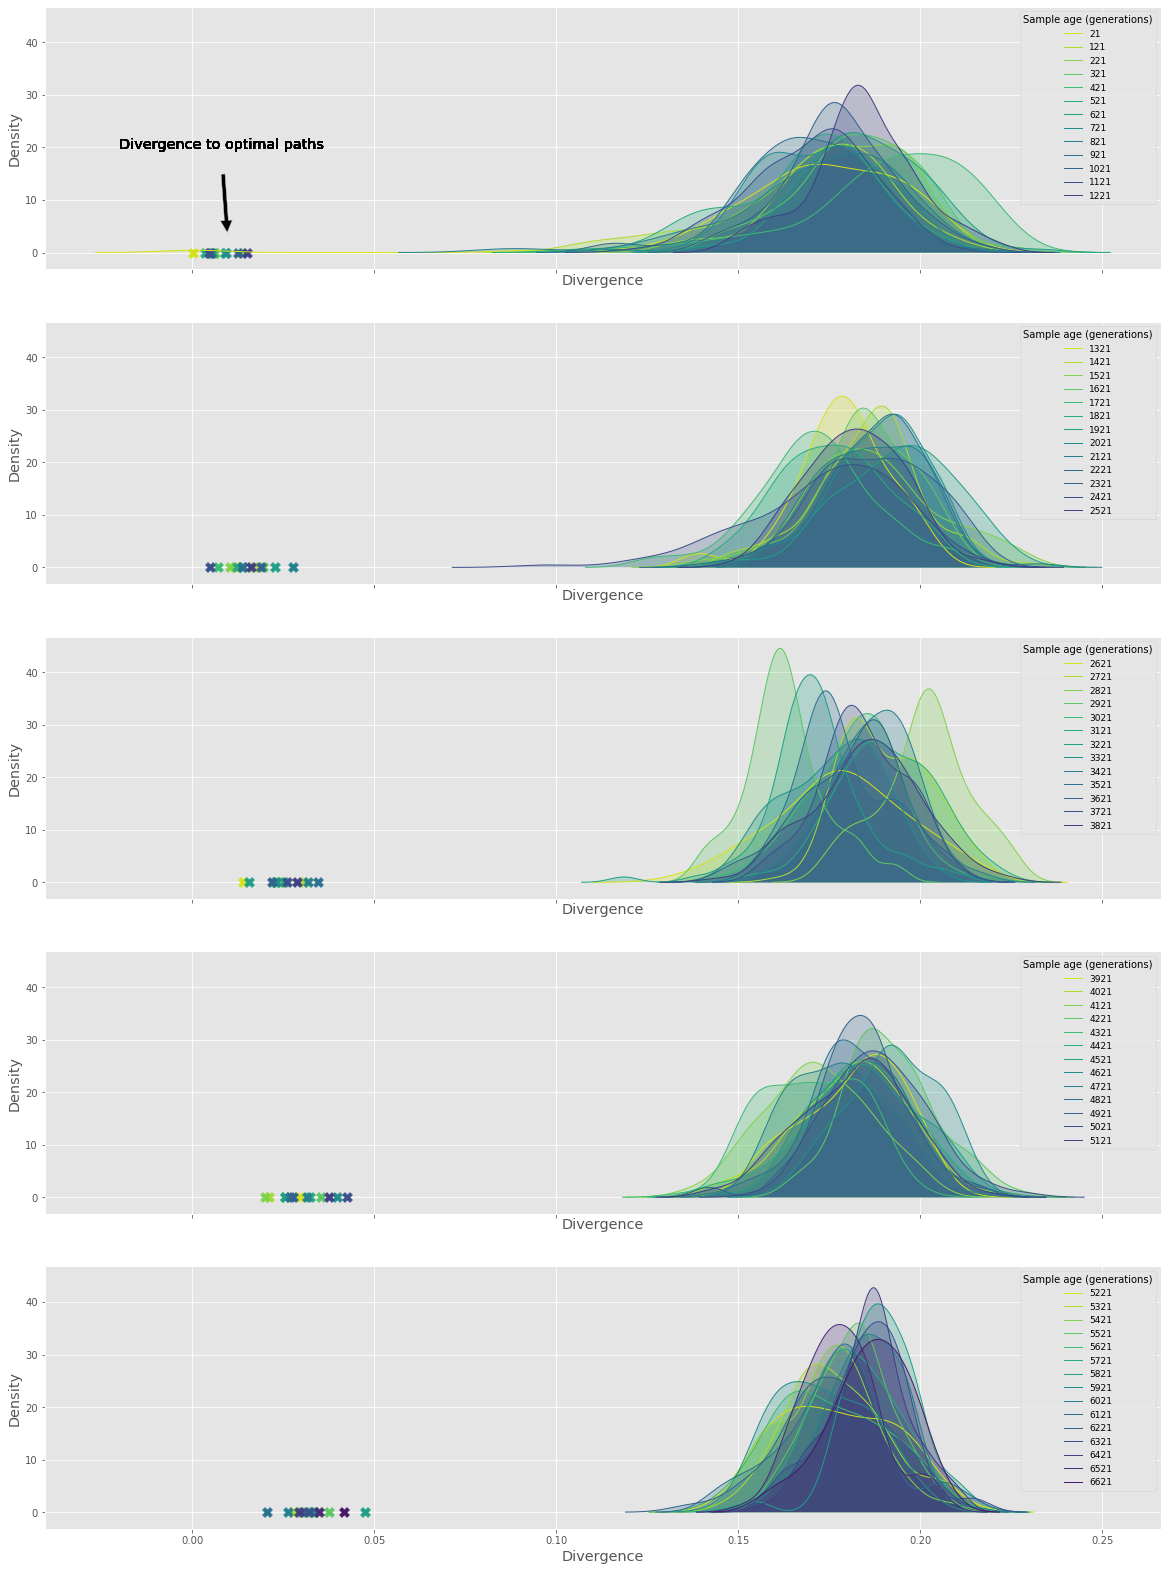

In [14]:
sequential_palette = sns.color_palette("viridis_r", n_colors=15)
sns.set_palette(sequential_palette)
fig, axs = plt.subplots(5, figsize=(20, 28), sharex = True, sharey = True)
#fig.suptitle('Distribution of Divergence from target to panel haplotypes', fontsize=20, y = 0.9)


for i in range(0,13):
    sns.distplot (df_100['edit_dist'][i], ax= axs[0], hist = False, kde=True, rug = False,
             kde_kws={'linewidth': 1, 'shade': True}, label=int(df_100.time[i]))

    #axs[0].vlines(df_100['avg_edit_dist'][i], ymin=0 , ymax=40, colors=sequential_palette[i])
    axs[0].scatter(df_100['avg_edit_dist'][i], 0, marker='X', s=100)
    axs[0].annotate('Divergence to optimal paths', xy=(0.01, 0),  xycoords='data',
            xytext=(0.25, 0.5), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.2),
            horizontalalignment='right', verticalalignment='top', fontsize ='x-large'
            )
    axs[0].set_xlabel('Divergence', fontsize='x-large')
    axs[0].set_ylabel('Density', fontsize='x-large')
    axs[0].legend(title="Sample age (generations)", fontsize='9')
    
j=0
for i in range(13,26):
    sns.distplot (df_100['edit_dist'][i], ax= axs[1], hist = False, kde=True, rug = False,
             kde_kws={'linewidth': 1, 'shade': True}, label=int(df_100.time[i]))
    #axs[1].vlines(df_100['avg_edit_dist'][i], ymin=0 , ymax=40, colors=sequential_palette[j])
    axs[1].scatter(df_100['avg_edit_dist'][i], 0, marker='X', s=100)
    j+=1
    axs[1].set_xlabel('Divergence', fontsize='x-large')
    axs[1].set_ylabel('Density', fontsize='x-large')
    axs[1].legend(title="Sample age (generations)", fontsize='9')
    
j=0
for i in range(26,39):
    sns.distplot (df_100['edit_dist'][i], ax= axs[2], hist = False, kde=True, rug = False,
             kde_kws={'linewidth': 1, 'shade': True}, label=int(df_100.time[i]))
    #axs[2].vlines(df_100['avg_edit_dist'][i], ymin=0 , ymax=40, colors=sequential_palette[j])
    axs[2].scatter(df_100['avg_edit_dist'][i], 0, marker='X', s=100)
    j+=1
    axs[2].set_xlabel('Divergence', fontsize='x-large')
    axs[2].set_ylabel('Density', fontsize='x-large')
    axs[2].legend(title="Sample age (generations)", fontsize='9')

j=0
for i in range(39,52):
    sns.distplot (df_100['edit_dist'][i], ax= axs[3], hist = False, kde=True, rug = False,
             kde_kws={'linewidth': 1, 'shade': True}, label=int(df_100.time[i]))
    #axs[3].vlines(df_100['avg_edit_dist'][i], ymin=0 , ymax=40, colors=sequential_palette[j])
    axs[3].scatter(df_100['avg_edit_dist'][i], 0, marker='X', s=100)
    j+=1
    axs[3].set_xlabel('Divergence', fontsize='x-large')
    axs[3].set_ylabel('Density', fontsize='x-large')
    axs[3].legend(title="Sample age (generations)", fontsize='9')
    
j=0    
for i in range(52,67):
    sns.distplot (df_100['edit_dist'][i], ax= axs[4], hist = False, kde=True, rug = False,
             kde_kws={'linewidth': 1, 'shade': True}, label=int(df_100.time[i]))
    #axs[4].vlines(df_100['avg_edit_dist'][i], ymin=0 , ymax=40, colors=sequential_palette[j])
    axs[4].scatter(df_100['avg_edit_dist'][i], 0, marker='X', s=100)
    j+=1
    axs[4].set_xlabel('Divergence', fontsize='x-large')
    axs[4].set_ylabel('Density', fontsize='x-large')
    axs[4].legend(title="Sample age (generations)", fontsize='9')

In [ ]:
#sns.kdeplot(data=tips, x="total_bill", hue="time", multiple="stack")

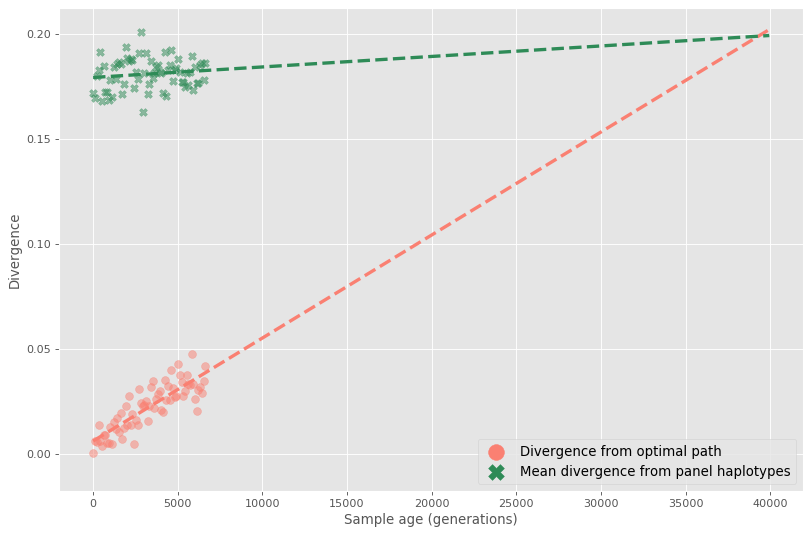

In [61]:
plt.figure(figsize=(12, 8), dpi=80)

plt.scatter(df_100.time, df_100.avg_edit_dist, marker='o', s=50, alpha=.5, c='salmon', label='Divergence from optimal path')
plt.scatter(df_100.time, df_100.edit_dist.apply(np.mean), marker='X', s=50, alpha=.5, c='seagreen', label='Mean divergence from panel haplotypes')
plt.xlabel('Sample age (generations)') #x label
plt.ylabel('Divergence') #y label
leg = plt.legend(fontsize='large', markerscale=2.0)
for lh in leg.legendHandles: 
    lh.set_alpha(1)

time = np.arange(0, 40000, 50)

x = df_100['time'].astype(str).astype(float)
y = df_100['avg_edit_dist'].astype(str).astype(float)
b, a = np.polyfit(x, y, deg=1)
plt.plot (time, a + b*time, c='salmon',linewidth=3, linestyle='--')

x_2 = df_100['time'].astype(str).astype(float)
y_2 = df_100['edit_dist'].apply(np.mean).astype(str).astype(float)
b_2, a_2 = np.polyfit(x_2, y_2, deg=1)
plt.plot (time, a_2 + b_2*time, c='seagreen',linewidth=3, linestyle='--')

plt.show()

In [3]:
directory = "C:/Users/Isabel/Documents/thesis/50kgen_1MB_100panel"
df_50k = create_df(directory)
df_50k.sort_values(by='time', inplace=True)

df_50k.reset_index(drop=True, inplace=True)
df_50k

,model_ll,scale_marginal,se_scale_marginal,scale_joint,se_scale_joint,eps_joint,se_eps_joint,time,n_snps,avg_dist,...,n_states,avg_edit_dist,mle,path_post,path_bl,post_bl,avg_edit_bl,cp_states_bl,jumps,jumps_bl
0,"[-58655.102836378326, -57981.94211154512, -573...",3558.778120240025,68.21937788479649,3.558773e+03,3.738074,0.008647,0.000223,21.0,6498,0.005050050063076924,...,"[14, 16, 17, 19, 30, 31, 4, 41, 45, 48, 5, 53,...",0.010003077870113881,fun: 52351.87599114887\n hess_inv: <2x2 ...,-586.1284895736027,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-30161.019261836333,0.005847953216374269,"[0, 1, 10, 12, 13, 17, 18, 19, 2, 23, 24, 29, ...",22,1793
1,"[-23891.909803179762, -23637.11023265205, -233...",1062.0352527119248,34.967448188174664,1.062035e+03,1.000000,0.002629,0.000065,221.0,6472,0.005057209110287304,...,"[16, 24, 26, 49, 52, 66, 67, 79, 87]",0.002781211372064277,fun: 20130.86964648011\n hess_inv: <2x2 ...,-215.02864306525316,"[0, 6, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-29892.96181982124,0.001854140914709518,"[0, 1, 10, 12, 13, 14, 16, 17, 2, 24, 26, 3, 3...",9,2052
2,"[-44817.42538178151, -44282.48958830719, -4375...",2514.0802735170982,56.92101806736599,2.514080e+03,1.000000,0.006373,0.000102,421.0,6486,0.005052201140567201,...,"[13, 16, 17, 29, 3, 33, 49, 5, 52, 64, 66, 67,...",0.007246376811594203,fun: 40197.33684793618\n hess_inv: <2x2 ...,-446.95541874111615,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-30046.932817645113,0.004162812210915819,"[0, 1, 10, 11, 12, 13, 14, 17, 18, 19, 2, 29, ...",17,1757
3,"[-25593.371116648563, -25272.965761265586, -24...",1427.7050981249618,40.958062637424064,1.427697e+03,1.445155,0.002303,0.000062,621.0,6467,0.005054699625908177,...,"[13, 15, 18, 2, 25, 33, 70, 79, 82, 87]",0.0027833616823875057,fun: 20926.09063188788\n hess_inv: <2x2 ...,-237.26027940269367,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-29839.046556188314,0.0010824184320395857,"[0, 1, 10, 12, 13, 15, 17, 18, 19, 2, 24, 3, 3...",11,1756
4,"[-38072.54229220653, -37489.44981297145, -3691...",2521.237618870846,55.82696212544325,2.521238e+03,1.000000,0.003761,0.000086,821.0,6477,0.005058312738076864,...,"[13, 16, 17, 19, 25, 26, 35, 5, 53, 54, 63, 64...",0.004014204106839586,fun: 32021.670068655283\n hess_inv: <2x2...,-373.16181820370764,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-29946.942182968865,0.0026246719160104987,"[0, 1, 10, 12, 13, 16, 17, 2, 22, 24, 26, 3, 4...",21,1862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,"[-610373.5807175268, -607050.6572853317, -6035...",165092732.83308595,2072.430472657633,1.650927e+08,1.000000,0.155569,0.000519,49021.0,6771,0.005070481380481323,...,"[0, 1, 10, 12, 13, 15, 16, 17, 2, 21, 23, 27, ...",0.09983754246049328,fun: 340241.4975315592\n hess_inv: <2x2 ...,-33233.51590364007,"[0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-33466.65115117989,0.09968985378821445,"[0, 1, 10, 12, 13, 15, 16, 17, 2, 21, 23, 27, ...",1698,1748
241,"[-623466.0364345689, -620076.4805439382, -6165...",156945755.38621223,2794.4646792608155,1.569458e+08,1.000000,0.157641,0.000520,49221.0,6778,0.0050607821238938065,...,"[0, 1, 10, 12, 13, 14, 15, 16, 17, 2, 21, 23, ...",0.1026851578636766,fun: 342118.60628123995\n hess_inv: <2x2...,-33299.26933588995,"[0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, ...",-33537.99255696292,0.10239008557096489,"[0, 1, 10, 12, 13, 14, 15, 16, 17, 2, 21, 23, ...",1694,1752
242,"[-609342.0253075074, -605661.773076567, -60181...",129186043.49179554,2022.484748073639,1.291860e+08,1.000000,0.150171,0.000514,49421.0,6750,0.0050663891143364935,...,"[0, 1, 10, 12, 13, 14, 15, 16, 17, 2, 21, 23, ...",0.09614814814814815,fun: 334920.86044416274\n hess_inv: <2x2...,-32980.15897122509,"[0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-33302.94662753366,0.09585185185185185,"[0, 1, 10, 12, 13, 14, 15, 16, 17, 2, 21, 23, ...",1682,1750
243,"[-587973.4943350991, -584521.5007911996, -5809...",15763

In [4]:
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
plt.style.use('ggplot')

Text(0.5, 1.0, 'B')

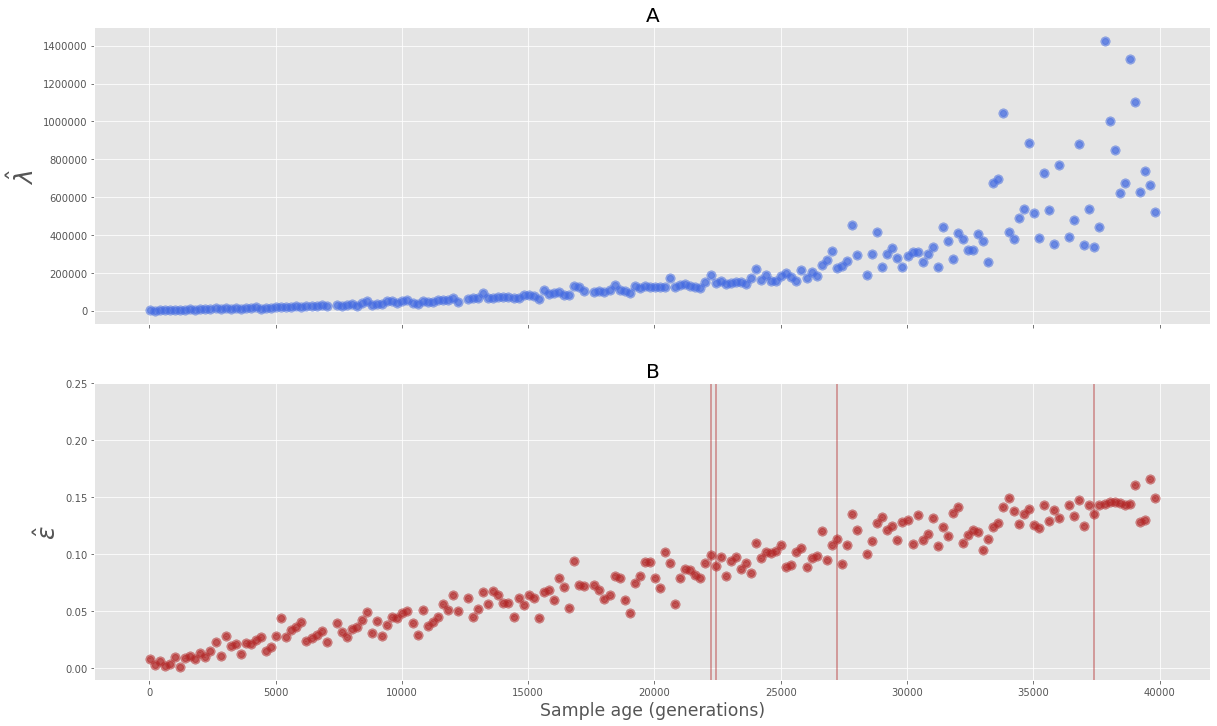

In [27]:
fig, axs = plt.subplots(2, figsize=(20,12), sharex=True)
#fig.suptitle('Maximum Likelihood Estimates vs Time', fontsize='20')

axs[0].scatter(df_50k[df_50k['time'] < 40000].time, df_50k[df_50k['time'] < 40000].scale_joint, c='royalblue', alpha=.5, s=90)
axs[0].errorbar(df_50k[df_50k['time'] < 40000].time, df_50k[df_50k['time'] < 40000].scale_joint, yerr=df_50k[df_50k['time'] < 40000].se_scale_joint, fmt="o", c='royalblue', alpha=.5)
#axs[0].set_xlabel('Time (generations)') #x label
axs[0].set_ylabel('$\hat{\lambda}$', fontsize='25') #y label
#axs[0].set_ylim(bottom= -1, top=0.6e8)
axs[0].set_title('A',loc='center', fontsize='20')
#axs[0].set_xlim(left=0, right=45000)

axs[1].scatter(df_50k[df_50k['time'] < 40000].time, df_50k[df_50k['time'] < 40000].eps_joint, c='firebrick', alpha=.5, s=90, marker='o')
axs[1].errorbar(df_50k[df_50k['time'] < 40000].time, df_50k[df_50k['time'] < 40000].eps_joint, yerr=df_50k[df_50k['time'] < 40000].se_eps_joint, fmt="o",  c='firebrick', alpha=.5)
axs[1].set_xlabel('Sample age (generations)', fontsize='xx-large') #x label
axs[1].set_ylabel('$\hat{\epsilon}$', fontsize='25') #y label
axs[1].set_ylim(bottom= -0.01, top=0.25)
axs[1].set_title('B',loc='center', fontsize='20')
#axs[1].set_xlim(left=0, right=45000)

Text(0.45, 0.05, 'Sample age (generations)')

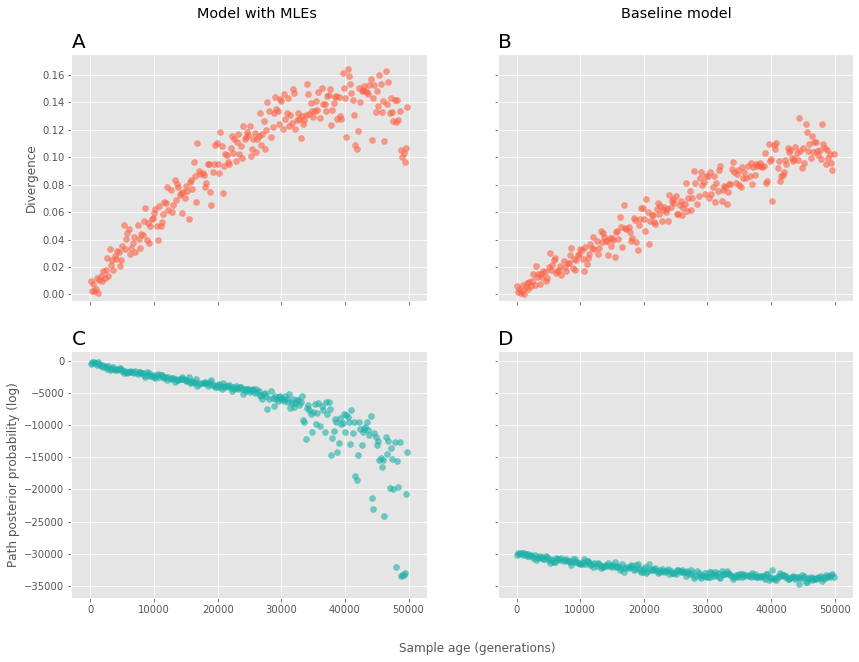

In [17]:
fig, axs = plt.subplots(2,2, figsize=(14,10), sharey='row', sharex=True)
#fig.suptitle('Comparison to a baseline model', fontsize=20)
#fig.text(0.35, 1, 'Comparison to a baseline model', fontsize='xx-large')
fig.text(x=.25 ,y=.93 ,s='Model with MLEs', fontsize='x-large')
fig.text(x=.67 ,y=.93 ,s='Baseline model', fontsize='x-large')

axs[0, 0].scatter(df_50k.time, df_50k.avg_edit_dist, c='Tomato', alpha=.6)
axs[0, 0].set_ylabel('Divergence') #y label
axs[0, 0].set_title('A', loc='left', fontsize=20)
axs[0, 0].set_ylim(top=0.175, bottom=-0.005)

axs[0, 1].scatter(df_50k.time, df_50k.avg_edit_bl, c='Tomato', alpha=.6)
axs[0, 1].set_title('B', loc='left', fontsize=20)

axs[1, 0].scatter(df_50k.time, df_50k.path_post, c='lightseagreen', alpha=.6)
#axs[1, 0].set_xlabel('Time (generations)') #x label
axs[1, 0].set_ylabel('Path posterior probability (log)') #y label
axs[1, 0].set_title('C', loc='left', fontsize=20)

axs[1, 1].scatter(df_50k.time, df_50k.post_bl, c='lightseagreen', alpha=.6)
#axs[1, 1].set_xlabel('Time (generations)') #x label
axs[1, 1].set_title('D', loc='left', fontsize=20)

#fig.suptitle('Comparison to a baseline model', fontsize=16)
#Text(0.5, 0.98, 'Comparison to a baseline model')
fig.text(0.45,0.05,'Sample age (generations)',fontsize='large', c='#565656')



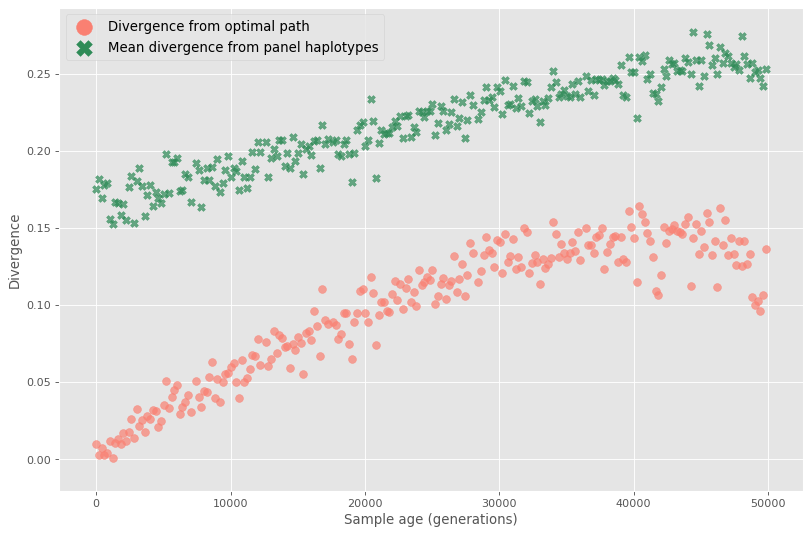

In [60]:
plt.figure(figsize=(12, 8), dpi=80)

plt.scatter(df_50k.time, df_50k.avg_edit_dist, c='salmon', label='Divergence from optimal path', marker='o', s=50, alpha=.7)
plt.scatter(df_50k.time, df_50k.edit_dist.apply(np.mean), c='seagreen', label='Mean divergence from panel haplotypes', marker='X', s=50, alpha=.7)
plt.xlabel('Sample age (generations)') #x label
plt.ylabel('Divergence') #y label

leg = plt.legend(fontsize='large', markerscale=2.0)
for lh in leg.legendHandles: 
    lh.set_alpha(1)


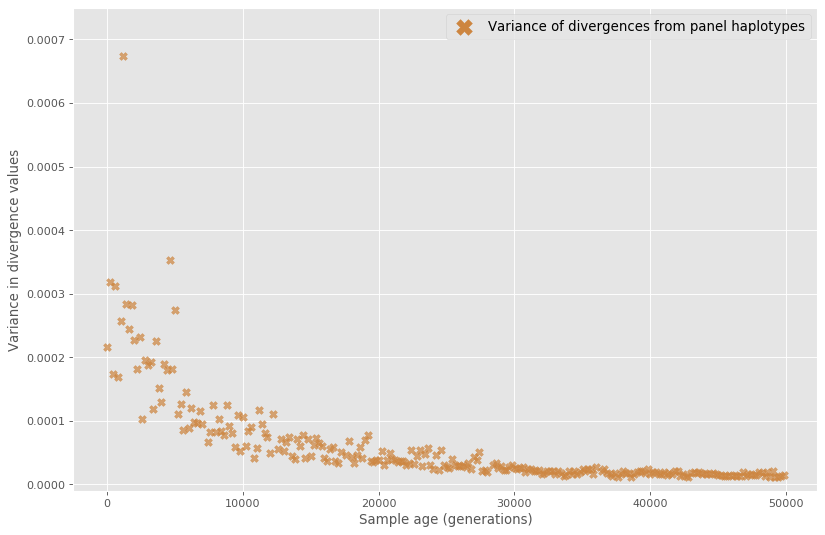

In [5]:
plt.figure(figsize=(12, 8), dpi=80)

plt.scatter(df_50k.time, df_50k.edit_dist.apply(np.var), c='peru', label='Variance of divergences from panel haplotypes', marker='X', s=50, alpha=.7)
#plt.scatter(df_50k.time, df_50k.edit_dist.apply(np.mean), c='seagreen', label='Mean divergence from panel haplotypes', marker='X', s=50, alpha=.7)
plt.xlabel('Sample age (generations)') #x label
plt.ylabel('Variance in divergence values') #y label
plt.ylim(top=0.00075, bottom=-0.00001)


leg = plt.legend(fontsize='large', markerscale=2.0)
for lh in leg.legendHandles: 
    lh.set_alpha(1)

In [21]:
# correlation of lambda, log posterior, divergence to optimal path, mean divergence to reference
# and variance of divergence to reference
condition = (df_50k.time >= 30000)

df_corr = pd.DataFrame()
df_corr['time'] = df_50k['time'].loc[condition].apply(pd.to_numeric)
df_corr['$\hat{\lambda}$'] = df_50k['scale_joint'].loc[condition]
df_corr['log_posterior'] = df_50k['path_post'].loc[condition].apply(pd.to_numeric)
df_corr['divergence'] = df_50k['avg_edit_dist'].loc[condition].apply(pd.to_numeric)
df_corr['mean_divergence'] = df_50k['edit_dist'].loc[condition].apply(np.mean)
df_corr['variance'] = df_50k['edit_dist'].loc[condition].apply(np.var)

df_corr

,time,$\hat{\lambda}$,log_posterior,divergence,mean_divergence,variance
146,30021.0,2.869264e+05,-5959.822101,0.140874,0.238838,0.000025
147,30221.0,3.103239e+05,-5922.198591,0.120575,0.223548,0.000025
148,30421.0,3.128370e+05,-6273.671423,0.145873,0.246014,0.000026
149,30621.0,2.594961e+05,-5479.829093,0.127966,0.229474,0.000028
150,30821.0,2.979301e+05,-5942.561305,0.131917,0.230291,0.000020
...,...,...,...,...,...,...
240,49021.0,1.650927e+08,-33233.515904,0.099838,0.250848,0.000021
241,49221.0,1.569458e+08,-33299.269336,0.102685,0.251970,0.000012
242,49421.0,1.291860e+08,-32980.158971,0.096148,0.247212,0.000011
243,49621.0,3.000000e+06,-20734.859535,0.106516,0.241851,0.000014


In [25]:
corr = df_corr.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,time,$\hat{\lambda}$,log_posterior,divergence,mean_divergence,variance
time,1.00,0.35,-0.73,-0.05,0.69,-0.61
$\hat{\lambda}$,0.35,1.00,-0.72,-0.50,0.12,-0.21
log_posterior,-0.73,-0.72,1.00,0.50,-0.47,0.46
divergence,-0.05,-0.50,0.50,1.00,0.51,-0.03
mean_divergence,0.69,0.12,-0.47,0.51,1.00,-0.49
variance,-0.61,-0.21,0.46,-0.03,-0.49,1.00


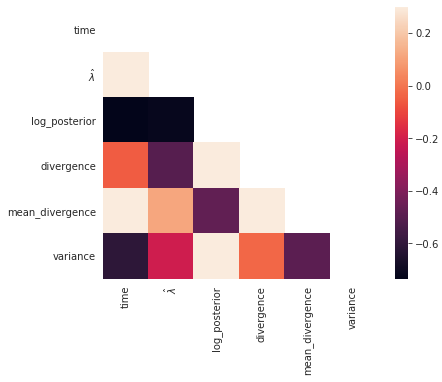

In [26]:

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)

## Appendix

Plots of the transition probabilities as a function of genetic distance for samples of different ages (meaning older samples will have higher jump rate parameters)

In [69]:
gen_dist_21 = np.load("C:/Users/Isabel/Documents/thesis/21_gendist.npz", allow_pickle=True)
dist_21 = gen_dist_21['dist']

gen_dist_3321 = np.load("C:/Users/Isabel/Documents/thesis/gen_dists/3321_gendist.npz", allow_pickle=True)
dist_3321 = gen_dist_3321['dist']

gen_dist_6621 = np.load("C:/Users/Isabel/Documents/thesis/gen_dists/6621_gendist.npz", allow_pickle=True)
dist_6621 = gen_dist_6621['dist']

gen_dist_121 = np.load("C:/Users/Isabel/Documents/thesis/121_gendist.npz", allow_pickle=True)
dist_121 = gen_dist_121['dist']

In [70]:
rate_21 = df_100['scale_joint'][0]
rate_3321 = df_100['scale_joint'][33]
rate_6621 = df_100['scale_joint'][66]
rate_121 = df_100['scale_joint'][1]

In [71]:
k = 100

def no_transition(rho, k, dist):
    return np.exp(-rho*dist)+(1-np.exp(-rho*dist))*(1/k)

def transition (rho, k, dist):
    return(1-np.exp(-rho*dist))*(1/k)

In [72]:
no_trans_prob_21 = no_transition(rate_21, k, dist_21)
trans_prob_21 = transition(rate_21, k, dist_21)

In [73]:
no_trans_prob_121 = no_transition(rate_121, k, dist_121)
trans_prob_121 = transition(rate_121, k, dist_121)

In [74]:
no_trans_prob_3321 = no_transition(rate_3321, k, dist_3321)
trans_prob_3321 = transition(rate_3321, k, dist_3321)

In [75]:
no_trans_prob_6621 = no_transition(rate_6621, k, dist_6621)
trans_prob_6621 = transition(rate_6621, k, dist_6621)

Text(0.5, 1.0, 'B')

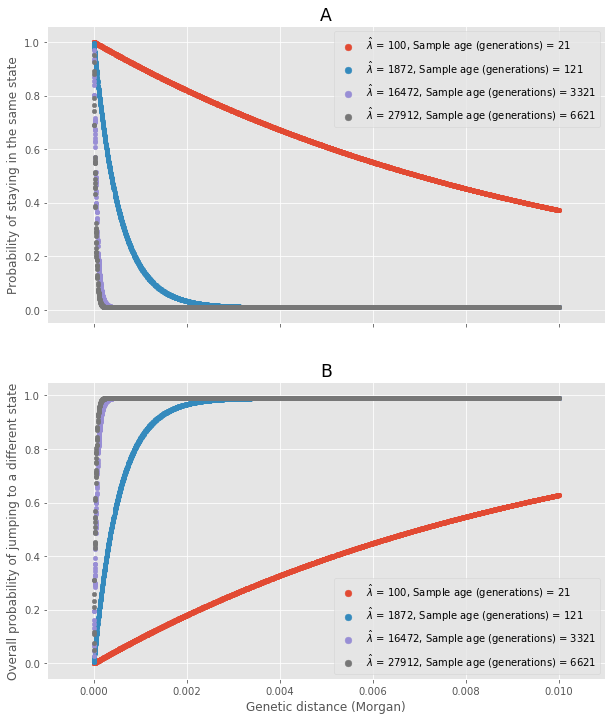

In [85]:
fig, axs = plt.subplots(2, figsize=(10,12), sharex=True)

axs[0].set_xlim(left=-0.001, right=0.011)
axs[1].set_xlim(left=-0.001, right=0.011)

axs[0].scatter(dist_21, no_trans_prob_21, marker='o', s=20)
axs[0].scatter(dist_121, no_trans_prob_121, marker='o', s=20)
axs[0].scatter(dist_3321, no_trans_prob_3321, marker='o', s=20)
axs[0].scatter(dist_6621, no_trans_prob_6621, marker='o', s=20)
axs[0].set_ylabel('Probability of staying in the same state')
axs[0].legend(['$\hat{\lambda}$ = '+str(int(round(rate_21)))+', Sample age (generations) = 21',
               '$\hat{\lambda}$ = '+str(int(round(rate_121)))+', Sample age (generations) = 121',
               '$\hat{\lambda}$ = '+str(int(round(rate_3321)))+', Sample age (generations) = 3321',
              '$\hat{\lambda}$ = '+str(int(round(rate_6621)))+', Sample age (generations) = 6621'],
             markerscale=1.5)
axs[0].set_title('A', loc='center', fontsize = 'xx-large')

axs[1].scatter(dist_21, trans_prob_21*99, marker='o', s=20)
axs[1].scatter(dist_121, trans_prob_121*99, marker='o', s=20)
axs[1].scatter(dist_3321, trans_prob_3321*99, marker='o', s=20)
axs[1].scatter(dist_6621, trans_prob_6621*99, marker='o', s=20)
axs[1].set_xlabel('Genetic distance (Morgan)')
axs[1].set_ylabel('Overall probability of jumping to a different state')
axs[1].legend(['$\hat{\lambda}$ = '+str(int(round(rate_21)))+', Sample age (generations) = 21',
               '$\hat{\lambda}$ = '+str(int(round(rate_121)))+', Sample age (generations) = 121',
               '$\hat{\lambda}$ = '+str(int(round(rate_3321)))+', Sample age (generations) = 3321',
              '$\hat{\lambda}$ = '+str(int(round(rate_6621)))+', Sample age (generations) = 6621'],
             markerscale=1.5)
axs[1].set_title('B', loc='center', fontsize = 'xx-large')

In [47]:
dist_21

array([1.81000e-06, 2.88000e-06, 4.15000e-06, ..., 9.99730e-03,
       9.99855e-03, 9.99954e-03])